In [121]:
import pandas as pd
import os
import re

small_path = "../data/kalpha/sentiment/zoom1/"
#df = pd.read_csv("../exp/kalpha/", index_col=0)

def get_df_dict(path):
    cells_df = {}
    for r, d, f in os.walk(path):
        for file in f:
            match = re.search(".*k:([^_]*).*a:([^_]*)", file)
            k=int(match.group(1))
            alfa=int(match.group(2))
            cells_df[(alfa, k)] = pd.read_csv(path + file)

    sk = list(cells_df.keys())
    sk.sort()
    
    return cells_df, sk

cells_df, sk = get_df_dict(small_path)

In [122]:
print(sk)
print(sk[0])
cells_df[sk[0]]
len([_ for (i,j) in sk if j==1500])

[(500, 1800), (500, 1820), (500, 1840), (500, 1860), (500, 1880), (500, 1900), (500, 1920), (500, 1940), (500, 1960), (500, 1980), (500, 2000), (500, 2020), (500, 2040), (500, 2060), (500, 2080), (500, 2100), (525, 1800), (525, 1820), (525, 1840), (525, 1860), (525, 1880), (525, 1900), (525, 1920), (525, 1940), (525, 1960), (525, 1980), (525, 2000), (525, 2020), (525, 2040), (525, 2060), (525, 2080), (525, 2100), (550, 1800), (550, 1820), (550, 1840), (550, 1860), (550, 1880), (550, 1900), (550, 1920), (550, 1940), (550, 1960), (550, 1980), (550, 2000), (550, 2020), (550, 2040), (550, 2060), (550, 2080), (550, 2100), (575, 1800), (575, 1820), (575, 1840), (575, 1860), (575, 1880), (575, 1900), (575, 1920), (575, 1940), (575, 1960), (575, 1980), (575, 2000), (575, 2020), (575, 2040), (575, 2060), (575, 2080), (575, 2100), (600, 1800), (600, 1820), (600, 1840), (600, 1860), (600, 1880), (600, 1900), (600, 1920), (600, 1940), (600, 1960), (600, 1980), (600, 2000), (600, 2020), (600, 2040)

0

In [123]:
import numpy as np

def to_numpy(data, rows, cols, d, sk):
    grid=[]
    for i in range(0,rows):
        row = []
        for j in range(0,cols):
            row.append(max(d[sk[i*cols + j]][data]))
        grid.append(row)
    
    return np.array(grid)


data=to_numpy('acc', 11, 13, cells_df, sk)
    

id          8.000000
k        2110.000000
alpha     625.000000
time        0.935976
acc         0.664701
score       0.132940
Name: 7, dtype: float64
id          9.000000
k        2115.000000
alpha     670.000000
time        1.034539
acc         0.667092
score       0.133418
Name: 8, dtype: float64
id          5.000000
k        2105.000000
alpha     655.000000
time        1.019089
acc         0.667251
score       0.133450
Name: 4, dtype: float64
id         15.000000
k        2105.000000
alpha     655.000000
time        1.028697
acc         0.667251
score       0.133450
Name: 14, dtype: float64


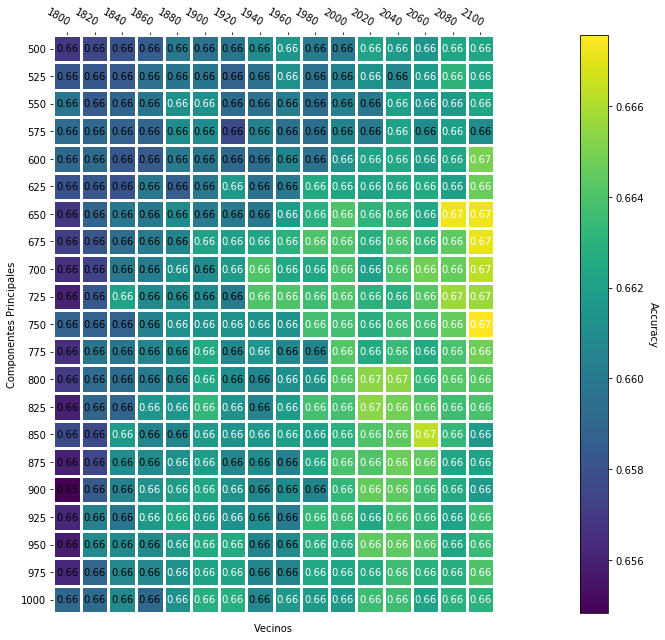

In [127]:
from heatmap import *

def fucking_plot_it(np_data, first_y, last_y, step_y, first_x, last_x, step_x):
    fig, ax = plt.subplots(figsize=(24,9))

    ax.set_xlabel('Vecinos')
    ax.set_ylabel('Componentes Principales')

    im, cbar = heatmap(np_data, [str(a) for a in range(first_y,last_y+step_y,step_y)]
                       , [str(k) for k in range(first_x, last_x+step_x, step_x)]
                       ,ax=ax, cbarlabel='Accuracy')
    texts = annotate_heatmap(im, valfmt="{x:.2f}")

    fig.tight_layout()
    plt.show()

# --grid-k {1800..2100..20} --grid-alpha {500..1000..25} \    
cols, first_x, last_x, step_x = 16, 1800, 2100, 20
rows, first_y, last_y, step_y = 21, 500, 1000, 25
data=to_numpy('acc', rows, cols, cells_df, sk)

print(cells_df[(625, 2100)].loc[cells_df[(625, 2100)]['acc'].idxmax()])
print(cells_df[(675, 2100)].loc[cells_df[(675, 2100)]['acc'].idxmax()]) 
print(cells_df[(650, 2100)].loc[cells_df[(650, 2100)]['acc'].idxmax()]) 
print(cells_df[(650, 2080)].loc[cells_df[(650, 2080)]['acc'].idxmax()])

fucking_plot_it(data, first_y, last_y, step_y, first_x, last_x, step_x)

In [5]:
# sanity check, del orden
print(max(cells_df[(400, 1625)]['acc']))
print(max(cells_df[(450, 1625)]['acc']))
print(max(cells_df[(500, 1625)]['acc']))
print(max(cells_df[(200, 1600)]['acc']))
print(max(cells_df[(250, 1600)]['acc']))


0.66
0.67
0.67
0.64
0.67


id        11.000000
k         50.000000
alpha    300.000000
time       0.335678
acc        0.673625
score      0.134725
Name: 10, dtype: float64
id        12.000000
k         50.000000
alpha    300.000000
time       0.334458
acc        0.673625
score      0.134725
Name: 11, dtype: float64
id        17.000000
k         50.000000
alpha    300.000000
time       0.329377
acc        0.673625
score      0.134725
Name: 16, dtype: float64


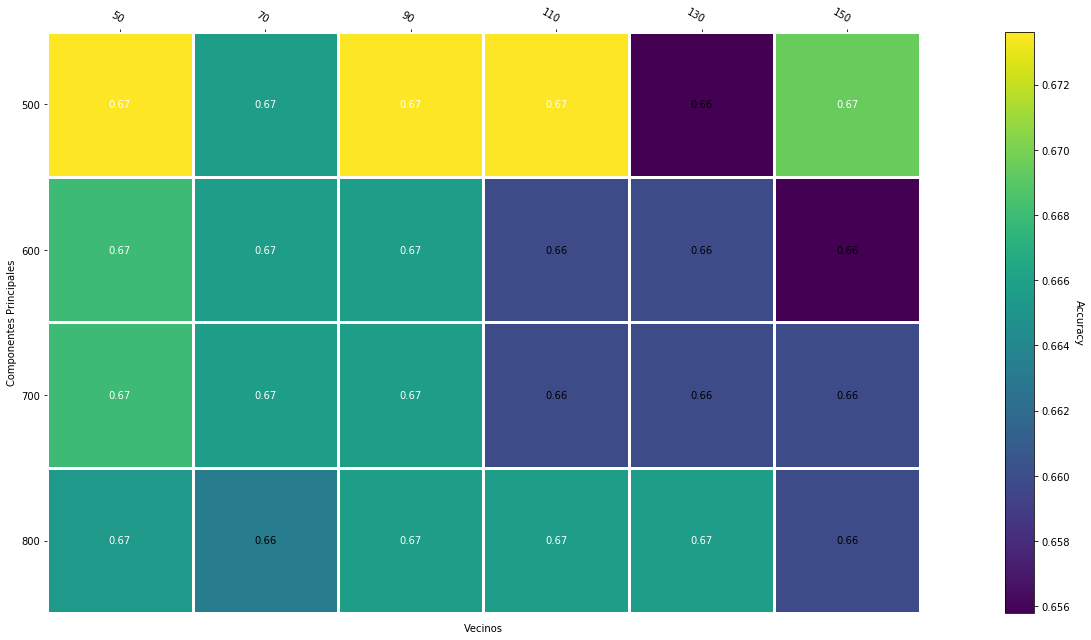

In [134]:
big_path = "../data/kalpha/sentiment/zoom2/"
big_cells_df, big_sk = get_df_dict(big_path)

#- --grid-k {50..150..20} --grid-alpha {500..800..100} \
cols, first_x, last_x, step_x = 6, 50, 150, 20
rows, first_y, last_y, step_y = 4, 500, 800, 100

pair1 = (500,50)
pair2 = (500,90)
pair3 = (500,110)
print(big_cells_df[pair1].loc[big_cells_df[pair1]['acc'].idxmax()])
print(big_cells_df[pair2].loc[big_cells_df[pair2]['acc'].idxmax()])
print(big_cells_df[pair3].loc[big_cells_df[pair3]['acc'].idxmax()])

big_data=to_numpy('acc', rows, cols, big_cells_df, big_sk)
fucking_plot_it(big_data, first_y, last_y, step_y, first_x, last_x, step_x)

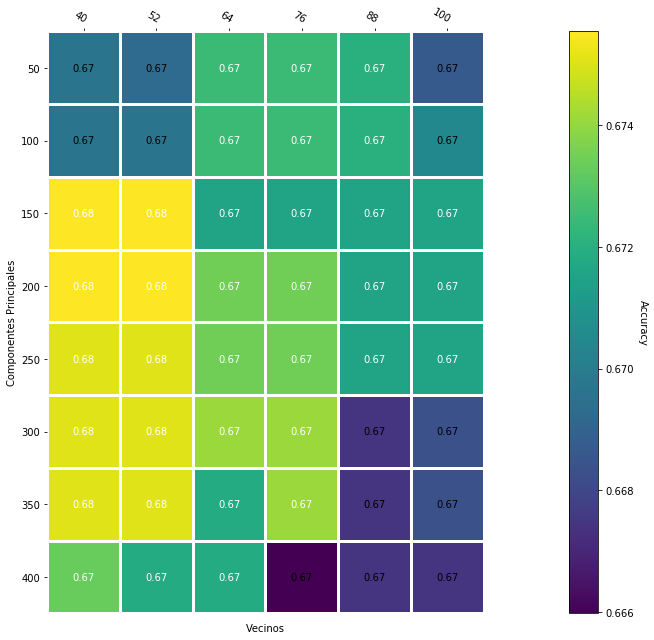

In [143]:
big_path = "../data/kalpha/sentiment/big_ext/"
big_cells_df, big_sk = get_df_dict(big_path)

#--grid-k {40..100..12} --grid-alpha {400..50..50} \
cols, first_x, last_x, step_x = 6, 40, 100, 12
rows, first_y, last_y, step_y = 8, 50, 400, 50

"""
pair1 = (500,50)
pair2 = (500,90)
pair3 = (500,110)
print(big_cells_df[pair1].loc[big_cells_df[pair1]['acc'].idxmax()])
print(big_cells_df[pair2].loc[big_cells_df[pair2]['acc'].idxmax()])
print(big_cells_df[pair3].loc[big_cells_df[pair3]['acc'].idxmax()])
"""
big_data=to_numpy('acc', rows, cols, big_cells_df, big_sk)
fucking_plot_it(big_data, first_y, last_y, step_y, first_x, last_x, step_x)

id         6.000000
k         80.000000
alpha    980.000000
time       1.575490
acc        0.659602
score      0.131920
Name: 5, dtype: float64
id        32.000000
k         80.000000
alpha    980.000000
time       1.525082
acc        0.659602
score      0.131920
Name: 31, dtype: float64
id          6.000000
k         280.000000
alpha    1000.000000
time        1.598145
acc         0.626932
score       0.125386
Name: 5, dtype: float64


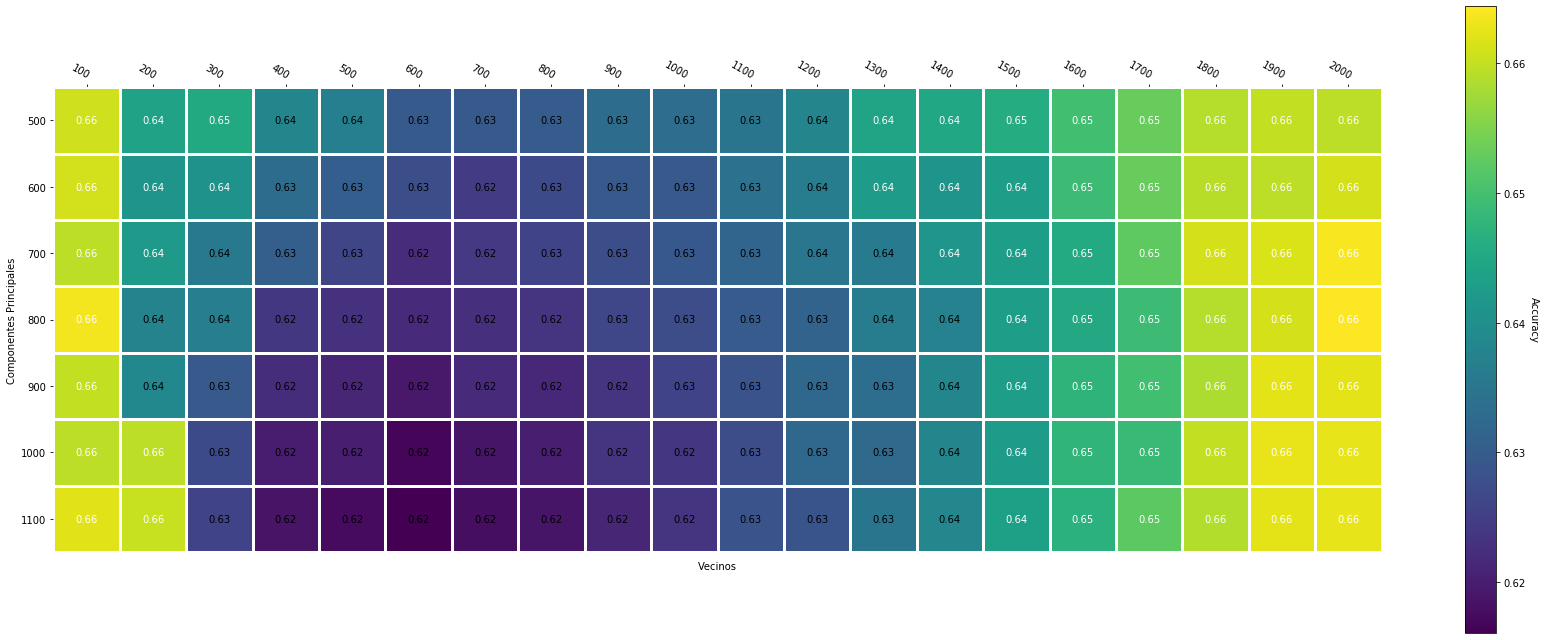

In [128]:
#big_path = "../bin/big/"
big_path = "../data/kalpha/sentiment/big_grid/"
big_cells_df, big_sk = get_df_dict(big_path)

#--grid-k {100..2000..100} --grid-alpha {1100..500..100} \
cols, first_x, last_x, step_x = 20, 100, 2000, 100
rows, first_y, last_y, step_y = 7, 500, 1100, 100

pair1 = (1000,100)
pair2 = (1000,200)
pair3 = (1000,300)
print(big_cells_df[pair1].loc[big_cells_df[pair1]['acc'].idxmax()])
print(big_cells_df[pair2].loc[big_cells_df[pair2]['acc'].idxmax()])
print(big_cells_df[pair3].loc[big_cells_df[pair3]['acc'].idxmax()])

big_data=to_numpy('acc', rows, cols, big_cells_df, big_sk)
fucking_plot_it(big_data, first_y, last_y, step_y, first_x, last_x, step_x)